EXERCISES 1
<<<<>>>><<<<<<<<<>>>>>>>>>

1. Give the adjacency matrices and the adjacency list representations of the
   graphs below:

   Convention: A loop contributes TWICE to the coresponding diagnol entry in
   the adjacency matrix. That is so that every arc contributes twice to the
   matrix, and the sum of the matrix entries is twice the number of arcs (and
   the sum of each row is the degree of that node).

   Loops are only recorded once in adjacency lists.



1. ADJACENCY MATRICES AND LISTS (Q1)

    THE CONCEPT: We need to translate a visual graph into computer-readable 
    formats.
    - ADJACENCY MATRIX ($A$): A grid where $A_{ij}$ is the number of connections
      between Node $i$ and Node $j$.
    - ADJACENCY LIST: A list where each entry $i$ contains the neighbours of
      Node $i$  

MATHEMATICAL SYNTAX RULES (from lectures):
    1. LOOPS in MATRICES: If a node has a loop (connects to itself), the diagnol
       entry $A_{ii}$ must be 2, not 1. (This ensures the sum.of the row equals
       the degree of the node.)
    2. LOOPS IN LISTS: In the adjacency list, a loop is recorded ONLY ONCE.
    3. SYMMETRY: Since these are undirected graphs, the matrix will be symmetric
       ($A_{ij} = A_{ji}$)



2. DRAWING GRAPHS FROM MATRICES

THE CONCEPT: We are reversing the process. We look at the matrix entries to draw
the nodes and edges.

MATHEMATICAL SYNTAX ANALYSIS:
- ENTRY 0: No line.
- ENTRY 1: Single line.
- ENTRY 2 ON DIAGNOL ($A_{ii}$): A loop on Node $i$.
- ENTRY 2 OFF-DIAGNOL ($A_{ij}$ WHERE $i \neq j$): Two parallel lines 
  (multigraph) connecting $i$ and $j$.



3. GRAPH ISOMORPHISM

THE CONCEPT: To explain why two graphs are NOT isomorphic (not the same 
structure), we must find a specific property (an "invariant") that one graph
has and the other lacks.

COMMON INVARIANTS TO CHECK:
   1. NUMBER OF NODES/ARCS: (Both have 6 nodes and 7 arcs here, so this doesn't
      help).
   2. DEGREE SEQUENCE: List the degrees of all nodes.
         - LEFT GRAPH (Ladder): Corners have degree 2. Middle nodes have degree
           3. Sequence: ${2, 2, 2, 2, 3, 3}$.
         - RIGHT GRAPH: Corners have degree 2. Middle nodes have degree 3.     

      ...



---

In [ ]:
                 _______
                / _____ \
          _____/ /     \ \_____
         / _____/  311  \_____ \
   _____/ /     \       /     \ \_____
  / _____/  221  \_____/  412  \_____ \
 / /     \       /     \       /     \ \
/ /  131  \_____/  322  \_____/  513  \ \
\ \       /     \       /     \       / /
 \ \_____/  232  \_____/  423  \_____/ /
 / /     \       /     \       /     \ \
/ /  142  \_____/  333  \_____/  524  \ \
\ \       /     \       /     \       / /
 \ \_____/  243  \_____/  434  \_____/ /
 / /     \       /     \       /     \ \
/ /  153  \_____/  344  \_____/  535  \ \
\ \       /     \       /     \       / /
 \ \_____/  254  \_____/  445  \_____/ /
  \_____ \       /     \       / _____/
        \ \_____/  355  \_____/ /
         \_____ \       / _____/
               \ \_____/ /
                \_______/

You jave hit on the exact reason why Graph Isomorphism is one of the most famous
problems in computer science. You are correct: just because two graphs look
different or have different labels (start node 1 in corner vs. middle) doesn't
mean they are different.

Since there is no simple formula to calculate "Isomorphism = True," the GENERAL
TECHNIQUE for exams and algorithms relies on two steps:
    1. THE "FINGERPRINT" TEST (INVARIANTS): To quickly prove they are NOT
       isomorphic.
    2. THE "BIJECTION" SEARCH (MAPPING): To prove they ARE isomorphic.



1. THE "FINGERPRINT" TEST (INVARIANTS)

If two graphs are the same, they msut share the exact same structural properties
("Invariants"). If any of these differ, you can immediately say "NOT Isomorphic".

THE CHECKLIST (Run this in your head):
    1. COUNT NODES: Do they both have $N$ nodes?
    2. COUNT EDGES: Do they both have $E$ edges?
    3. DEGREE SEQUENCE (CRUCIAL): List the degree of all nodes in ascending 
       order.
        - Graph A: [1, 1, 2, 2, 3]
        - Graph B: [1, 1, 2, 3, 3]
        - Result: Different? Stop. Not Isomorphic.
    4. SUBSTRUCTURES: Do they have the same "special" shapes?
        - "Graph A has a triangle (3 nodes connected). Does Graph B have a 
          triangle?"
        - "Graph A has a node of degree 4 connected to a node of degree 1. Does
          Graph B have that?"



2. THE "BIJECTION" SEARCH (THE LOGIC)

This addresses your specific worry: "What if I label the start node on the 
middle?"

To prove Isomorphism, you must find a BIJECTION (a 1-to-1 mapping) 
$f : N_1 \rightarrow N_2$ that preserves connections.
    - THE RULE: You can only map a node to a "Twin".
    - DEGREE CONSTRAINT: A node with degree 3 MUST map to a node with degree 3.
    - NEIGHBOR CONSTRAINT: If Node A is connected to Node B, then the mapped 
      Node $f(A)$ must be connected to $f(B)$.

YOUR EXAMPLE:
    - GRAPH LEFT: Node 1 is a CORNER (Degree 2).
    - GRAPH RIGHT: Node A is a MIDDLE (Degree 4).
    - TECHNIQUE: You are FORBIDDEN from mapping 1 to A. You must look for a node
      in Graph Right that also has Degree 2. If you can't find one, they aren't
      isomorphic.



PYTHON LAB: SOLVING YOUR "CORNER vs. MIDDLE" LABELLING PROBLEM
We will create two identical graphs with completely different labels and layouts
. We will use the DEGREE SEQUENCE to figure out which node maps to which.

--- STEP 1: FINGERPRINTS ---
Graph 1 Degrees: [1, 2, 2, 3] (1, 2, 2, 3)
Graph 2 Degrees: [1, 2, 2, 3] (1, 2, 2, 3)
-> Fingerprints match! Likely Isomorphic.

--- STEP 2: FINDING THE MAP ---
Proposed Mapping based on Degrees: {0: 'D', 3: 'B', 1: 'A', 2: 'C'}
Computer Verification: Are they isomorphic? True


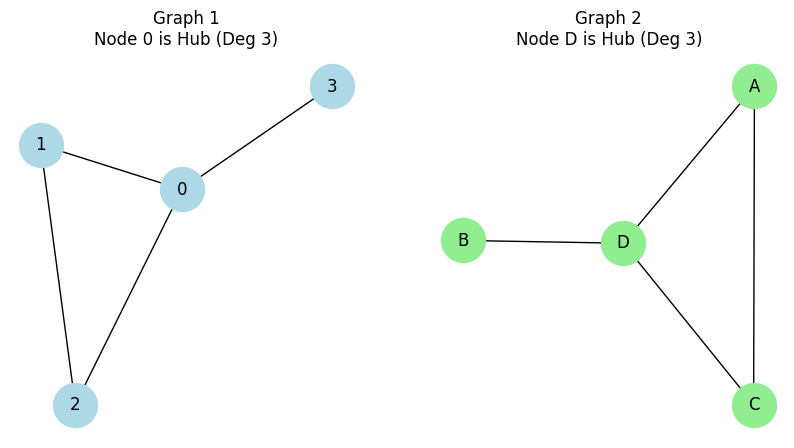

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

def solve_isomorphism():
    # --- 1. CREATE TWO "DIFFERENT LOOKING" GRAPHS ---
    
    # Graph A: A "Kite" shape (Triangle with a tail)
    # Nodes: 0, 1, 2, 3
    # 0 is the Hub (Degree 3), 3 is the Tail (Degree 1)
    G1 = nx.Graph()
    G1.add_edges_from([(0,1), (1,2), (2,0), (0,3)])
    
    # Graph B: Same shape, but scrambled labels and different layout
    # Nodes: 'A', 'B', 'C', 'D'
    # Let's hide the Hub at 'D' and the Tail at 'B'
    G2 = nx.Graph()
    G2.add_edges_from([('D','C'), ('C','A'), ('A','D'), ('D','B')])

    # --- 2. THE FINGERPRINT TEST (Degree Sequence) ---
    print("--- STEP 1: FINGERPRINTS ---")
    
    # Get degrees and sort them
    seq1 = sorted([d for n, d in G1.degree()])
    seq2 = sorted([d for n, d in G2.degree()])
    
    print(f"Graph 1 Degrees: {seq1} (1, 2, 2, 3)")
    print(f"Graph 2 Degrees: {seq2} (1, 2, 2, 3)")
    
    if seq1 == seq2:
        print("-> Fingerprints match! Likely Isomorphic.")
    else:
        print("-> Different. STOP.")
        return

    # --- 3. THE MAPPING (Logic) ---
    print("\n--- STEP 2: FINDING THE MAP ---")
    
    # We map nodes based on their Degree (The "Twin" logic)
    # G1 Node 0 has Degree 3. Who has Degree 3 in G2? -> Node 'D'.
    # G1 Node 3 has Degree 1. Who has Degree 1 in G2? -> Node 'B'.
    # G1 Nodes 1,2 have Degree 2. G2 Nodes A,C have Degree 2.
    
    mapping = {0: 'D', 3: 'B', 1: 'A', 2: 'C'} # 1 and 2 are swappable (automorphism!)
    
    print(f"Proposed Mapping based on Degrees: {mapping}")
    
    # Verify with NetworkX
    is_iso = nx.is_isomorphic(G1, G2)
    print(f"Computer Verification: Are they isomorphic? {is_iso}")

    # --- VISUALIZATION ---
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    
    # Draw G1 (Standard Layout)
    pos1 = nx.spring_layout(G1, seed=1)
    nx.draw(G1, pos1, ax=axes[0], with_labels=True, node_color='lightblue', node_size=1000)
    axes[0].set_title("Graph 1\nNode 0 is Hub (Deg 3)")
    
    # Draw G2 (Scrambled Layout)
    pos2 = nx.spring_layout(G2, seed=2) # Different seed = Different shape on screen
    nx.draw(G2, pos2, ax=axes[1], with_labels=True, node_color='lightgreen', node_size=1000)
    axes[1].set_title("Graph 2\nNode D is Hub (Deg 3)")
    
    plt.show()

solve_isomorphism()

EXAM NOTES: PART I (TOPIC 4) - ISOMORPHISM

Here is the formal text for your notes.


1. DEFINITION OF ISOMORPHISM
Two graphs $G_1 = (N_1, A_1)$ and $G_2 = (N_2, A_2)$ are ISOMORPHIC (written
$G_1 \cong G_2$) if there exists a bijection (a one-to-one correspondence)
$f: N_1 \to N_2$ such that:

- PRESERVATION OF ADJACENCY: Two nodes $u, v$ are adjacent if and only if their
  mapped counterparts $f(u), f(v)$ are adjacent in $G_2$.
- SYNTAX: ${u, v} \in A_1 \Longleftrightarrow {f(u), f(v)} \in A_2$.



2. THE ISOMORPHISM PROBLEM
Determining if two graphs are isomorphic is computationally hard. There is no 
known simple formula (it is in the complexity class NP, but not known to be
P or NP-Complete).



3. NECESSARY CONDITIONS (INVARIANTS)
To prove two graphs are NOT isomorphic, we check invariants. If any invariant
differs, the graphs are distinct.
    - ORDER: $|N_1| = |N_2|$ (Same number of nodes).
    - SIZE: $|A_1| = |A_2|$ (Same number of edges).
    - DEGREE SEQUENCE: The list of node degrees, sorted in ascending order, must
      be identical.
    - CONNECTIVITY: If $G_1$ is connected, $G_2$ must be connected.
    - CYCLES: If $G_1$ has a cycle of length $k$, $G_2$ must also have a cycle 
      of length $k$.



4. AUTOMORPHISM (SYMMETRY)
An AUTOMORPHISM is an isomorphism from a graph to itself ($ : N \rightarrow N$).
    - It represents a "symmetry" or "rotation" of the graph.
    - The set of all automorphisms 



---

In [ ]:
    _________
   /|\     /|\
  / |  \ /  | \
 /__|__/ \__|__\
|\  |  | |  |  /|
| \ |----|--| / |
| /\-\---|---/\ |
|/_____|\|_____\|
 \  |  \ /  |  /
  \ |  / \  | /
   \|/     \|/
    --------

... abstract algebra has a habit of slipping away when you aren't looking at it
directly.

Since you mentioned the "array" visualisation working for you before, let's 
start there to rebuild the intuition for the PERMUTATION GROUP, and then layer
AUTOMORPHISM on top of it.



1. THE "ARRAY" CLICK (PERMUTATIONS)

You likely remember the PERMUTATION GROUP (specifically the Symmetric Group, 
$S_n$) as a way of shuffling a list of numbers.

Think of a permutation as an ARRAY OF INDICES. If you have a set ${1, 2, 3}$, 
the "identity" (doing nothing) looks like this array:


Index:  [ 1, 2, 3 ]
Value:  [ 1, 2, 3 ]  <-- The elements stay in their "slots"

A permutation is just shuffling those values. Let's say we map $1 \to 2$, $2 \to 3$, and $3 \to 1$. In array format (one-line notation), it looks like this:

[ 2, 3, 1 ]

    - At index 1, we have 2.
    - At index 2, we have 3.
    - At index 3, we have 1.

WHY IS IT A GROUP?
1. CLOSURE: If you shuffle a deck of cards, then shuffle it again, it's still 
   just one big shuffle (composition).
2. IDENTITY: You can choose to leave the array as $[1, 2, 3]$.
3. INVERSUBKE: If you can shuffle it, you can "un-shuffle" it back to the start.



2. WHAT IS AN AUTOMORPHISM?

An AUTOMORPHISM is a specific kind of permutation.
- PERMUTATION: Any valid shuffle of the elements.
- AUTOMORPHISM: A shuffle of the elements that PRESERVES THE STRUCTURE of the
  object.

If you have a bag of unrelated marbles, any shuffle is valid. But if those 
marbles are connected by strings (like a graph) or have an order (like 
$1 < 2 < 3$), you can't just shuffle them randomly. You can only shuffle them in
ways that keeps the strings (connections) intact.


THE DEFINITION:
An automorphism is a bijective map $f : X \rightarrow X$ s.t. for any structure
relation $R$, if $a$ relates to $b$, then $f(a)$ must relate to $f(b)$.                  
                                            <-- kind of sound like the bijective testing schemes of testing for isomorphism tbf... i mean ig it makes sense because considering that
                                            automorphism is literally just a subset of isomorphism?



<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>
3. EXAMPLE: THE "BUTTERFLY" GRAPH

...
(won't bother with this... let's see more graphical examples instead!!!)

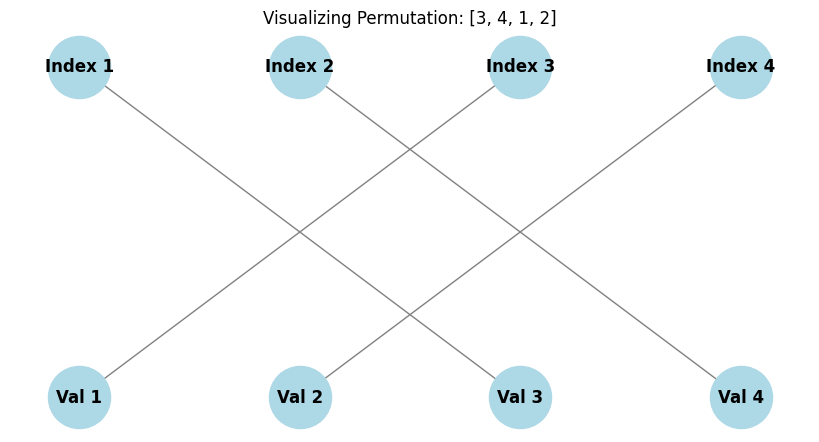

In [2]:
import matplotlib.pyplot as plt
import networkx as nx

def visualize_permutation_as_bipartite(elements, permutation, title):
    """
    Visualizes a permutation as a mapping from a Top row (Indices) 
    to a Bottom row (Values/Mapped Elements).
    """
    B = nx.Graph()
    top_nodes = [f"Index {i}" for i in elements]
    bottom_nodes = [f"Val {i}" for i in elements]
    
    B.add_nodes_from(top_nodes, bipartite=0)
    B.add_nodes_from(bottom_nodes, bipartite=1)
    
    # Create edges based on the permutation mapping
    edges = []
    for i, mapped_val in zip(elements, permutation):
        edges.append((f"Index {i}", f"Val {mapped_val}"))
    
    B.add_edges_from(edges)
    
    pos = {}
    for i, node in enumerate(top_nodes):
        pos[node] = (i, 1)
    for i, node in enumerate(bottom_nodes):
        pos[node] = (i, 0)
        
    plt.figure(figsize=(8, 4))
    nx.draw(B, pos, with_labels=True, node_color='lightblue', 
            node_size=2000, font_weight='bold', edge_color='gray')
    plt.title(title)
    plt.show()

# --- RUNNING THE EXAMPLE ---
elements = [1, 2, 3, 4]
# A shuffle: 1->3, 2->4, 3->1, 4->2
perm_array = [3, 4, 1, 2] 

visualize_permutation_as_bipartite(elements, perm_array, "Visualizing Permutation: [3, 4, 1, 2]")

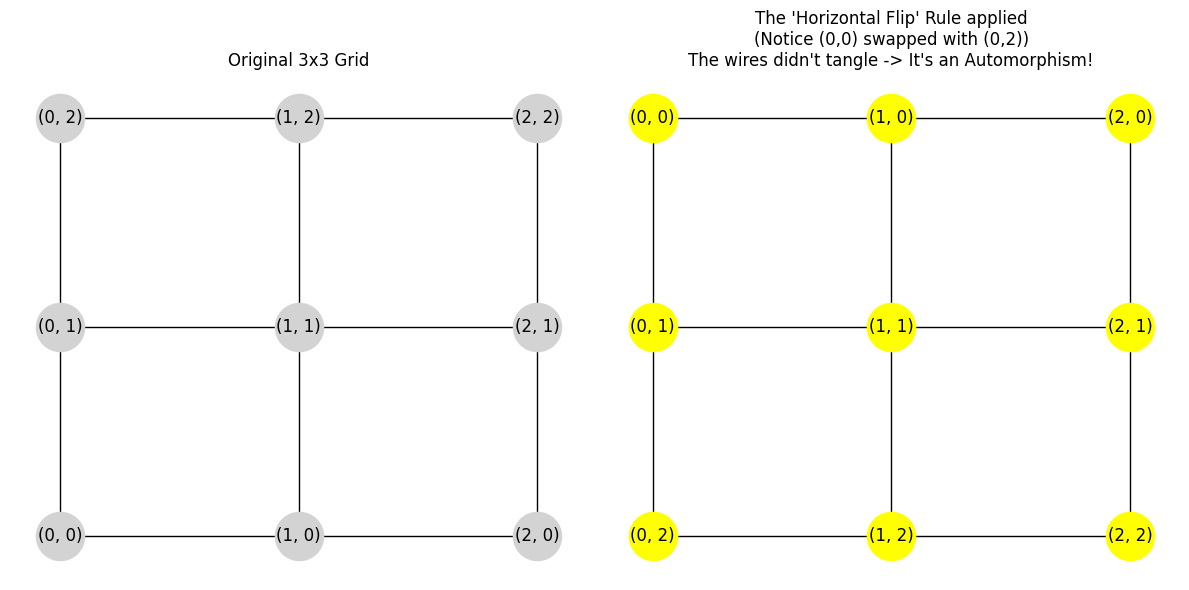

In [25]:
import networkx as nx
import matplotlib.pyplot as plt

# 1. Create a 3x3 Grid
G_grid = nx.grid_2d_graph(3, 3)

# 2. Define a "Generating Rule": Horizontal Flip
# Mathematical Logic: (x, y) -> (x, 2-y) (flipping the y-axis index)
def horizontal_flip(node):
    x, y = node
    return (x, 2 - y)

# Apply the rule to create the mapping
mapping = {node: horizontal_flip(node) for node in G_grid.nodes()}

# 3. Visualization of the "Flip Rule"
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Original
pos = {n: n for n in G_grid.nodes()}
nx.draw(G_grid, pos, ax=axes[0], with_labels=True, node_color='lightgray', node_size=1200)
axes[0].set_title("Original 3x3 Grid")

# Flipped (Automorphism)
G_flipped = nx.relabel_nodes(G_grid, mapping)

# KEY FIX: Draw each node at its ORIGINAL position, not its new label position
# The inverse mapping tells us: for each new label, where did it come from?
inverse_mapping = {v: k for k, v in mapping.items()}
pos_flipped = {node: inverse_mapping[node] for node in G_flipped.nodes()}

nx.draw(G_flipped, pos_flipped, ax=axes[1], with_labels=True, node_color='yellow', node_size=1200)
axes[1].set_title("The 'Horizontal Flip' Rule applied\n(Notice (0,0) swapped with (0,2))\nThe wires didn't tangle -> It's an Automorphism!")

plt.tight_layout()
plt.show()

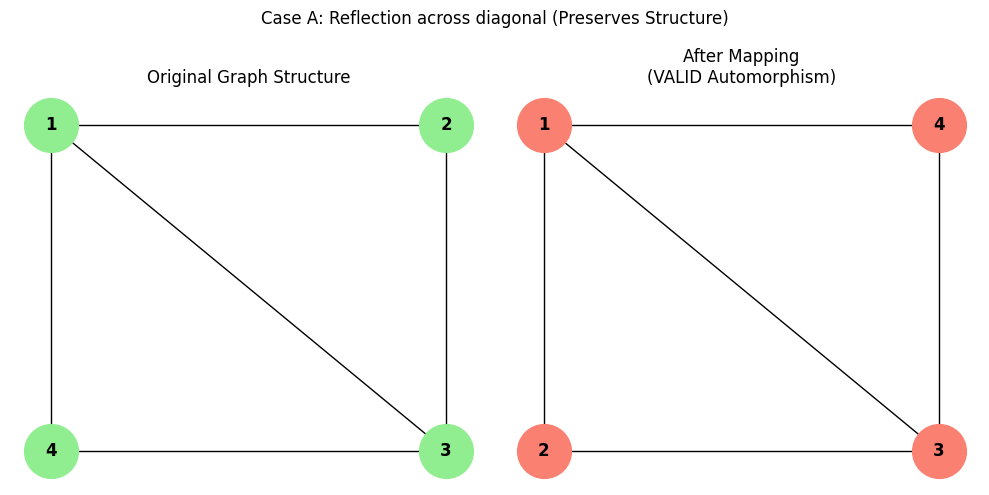

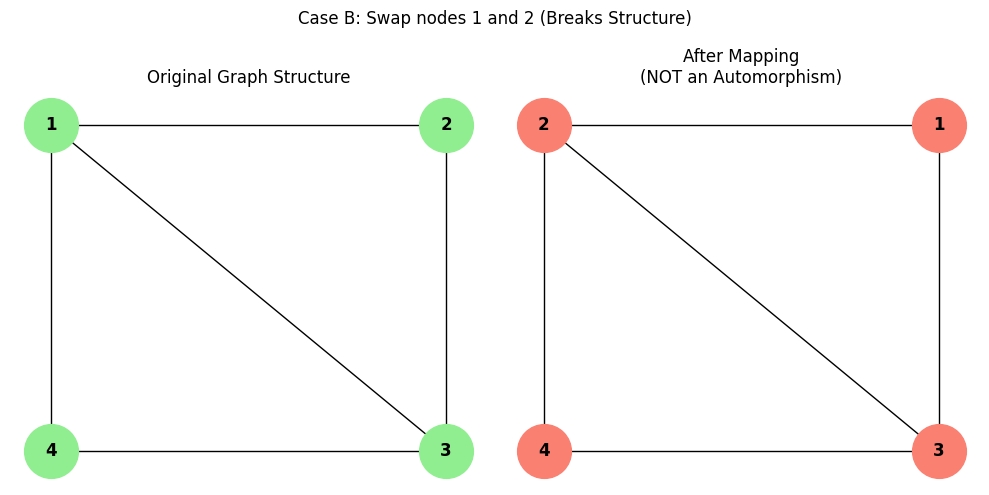

In [8]:
import matplotlib.pyplot as plt
import networkx as nx

def is_automorphism(G, mapping):
    """
    Check if a mapping is actually an automorphism of G.
    For every edge (u,v) in G, there must be an edge (mapping[u], mapping[v]) in G.
    """
    for u, v in G.edges():
        if not G.has_edge(mapping[u], mapping[v]):
            return False
    return True

def draw_comparison(G, mapping, title):
    """
    Draws the original graph and the graph after applying the mapping.
    If the mapping is an Automorphism, the geometry (edges) will look IDENTICAL.
    """
    plt.figure(figsize=(10, 5))
    
    # 1. Setup Original Graph Layout
    # We fix the layout so '1' is always top-left, '2' top-right, etc.
    fixed_pos = {1: (0, 1), 2: (1, 1), 3: (1, 0), 4: (0, 0)}
    
    # Plot Original
    plt.subplot(1, 2, 1)
    nx.draw(G, fixed_pos, with_labels=True, node_color='lightgreen', node_size=1500, font_weight='bold')
    plt.title("Original Graph Structure")

    # 2. Create the Permuted Graph
    H = nx.relabel_nodes(G, mapping)
    
    # 3. KEY FIX: Position each node where its ORIGINAL self was located
    # If mapping[old] = new, then 'new' should be drawn at fixed_pos[old]
    inverse_mapping = {v: k for k, v in mapping.items()}
    pos_H = {node: fixed_pos[inverse_mapping[node]] for node in H.nodes()}
    
    # Plot Permuted with corrected positions
    plt.subplot(1, 2, 2)
    nx.draw(H, pos_H, with_labels=True, node_color='salmon', node_size=1500, font_weight='bold')
    
    # Check if mapping is actually an automorphism (not just isomorphism!)
    is_auto = is_automorphism(G, mapping)
    status = "VALID Automorphism" if is_auto else "NOT an Automorphism"
    plt.title(f"After Mapping\n({status})")
    
    plt.suptitle(title)
    plt.tight_layout()

# --- SETUP ---
# Create a Square Graph WITH ONE DIAGONAL: 1-2, 2-3, 3-4, 4-1, plus 1-3
# This breaks the symmetry so we can demonstrate non-automorphisms
G = nx.Graph()
G.add_edges_from([(1, 2), (2, 3), (3, 4), (4, 1), (1, 3)])  # Square + diagonal

# --- CASE A: A Valid Rotation that works for this graph ---
# Reflection across the 1-3 diagonal: 2<->4, 1 and 3 stay
reflection_map = {1: 1, 2: 4, 3: 3, 4: 2}
draw_comparison(G, reflection_map, "Case A: Reflection across diagonal (Preserves Structure)")

# --- CASE B: A mapping that BREAKS the structure ---
# Swap 1 and 2: This breaks the graph because 4-1 becomes 4-2 (which doesn't exist)
swap_map = {1: 2, 2: 1, 3: 3, 4: 4}
draw_comparison(G, swap_map, "Case B: Swap nodes 1 and 2 (Breaks Structure)")

plt.show()

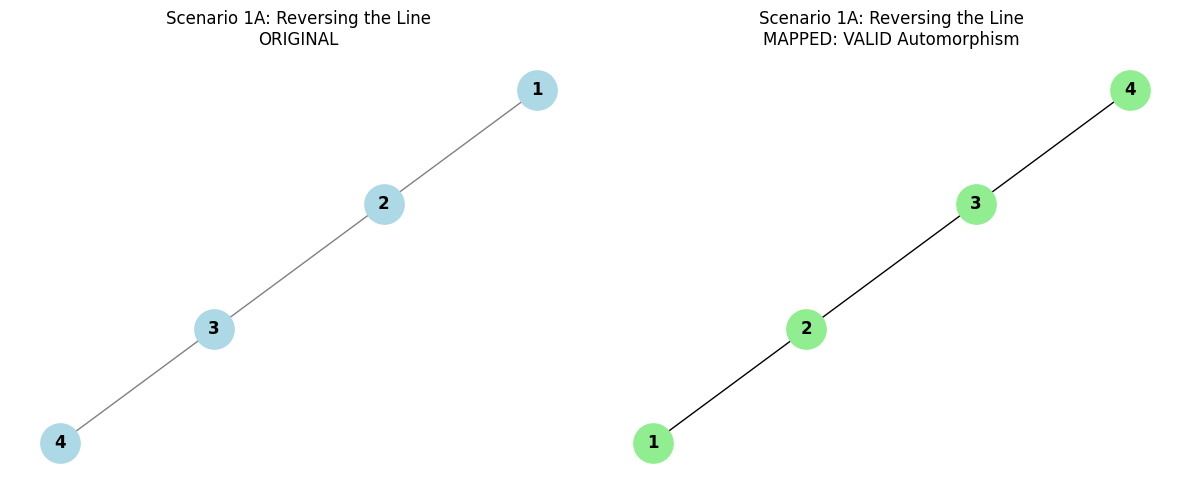

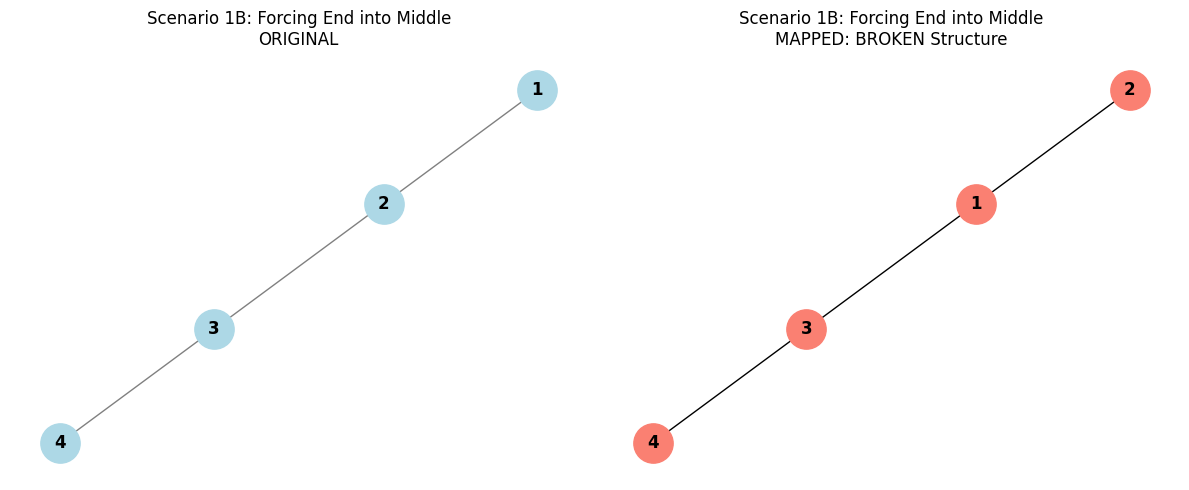

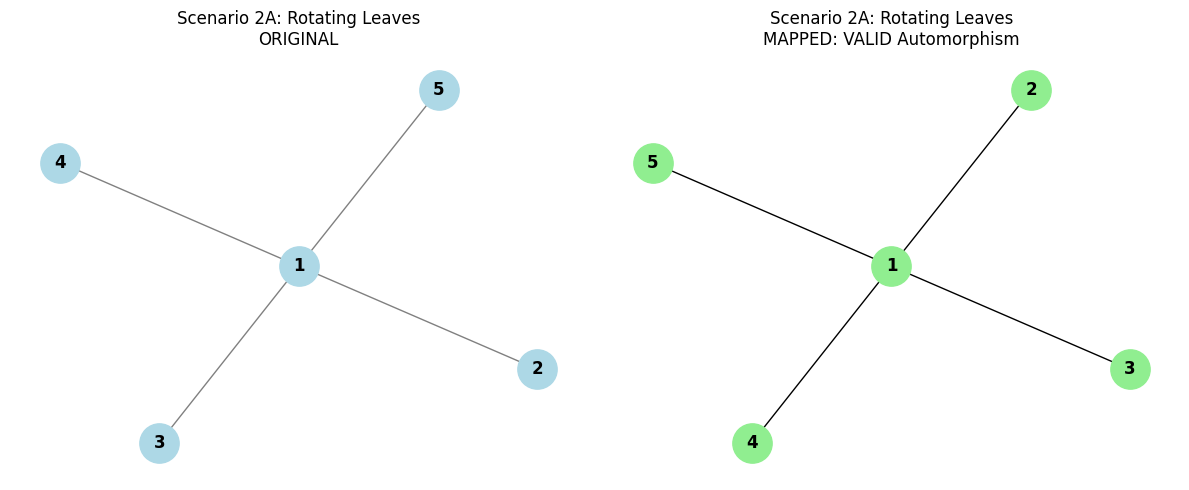

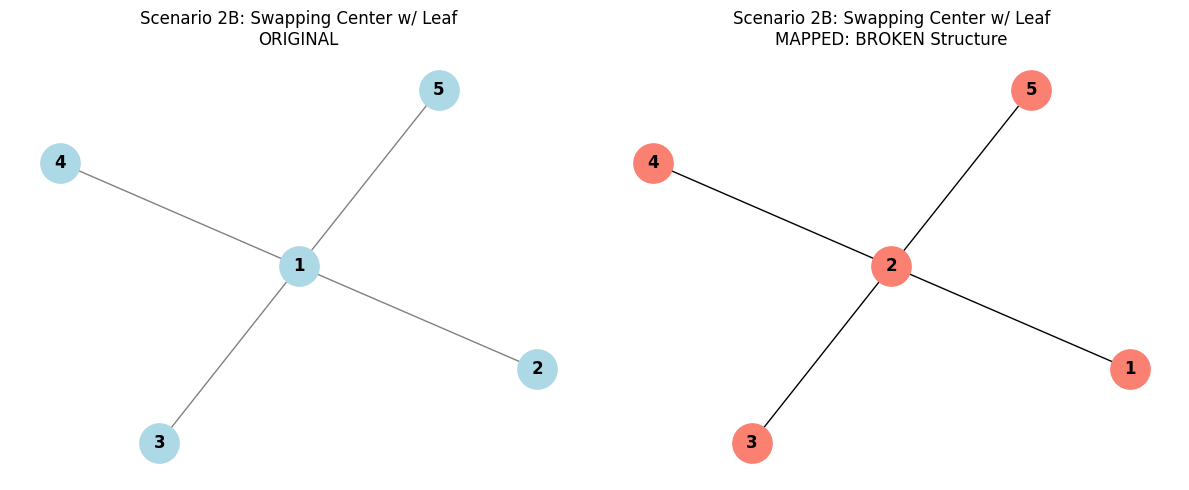

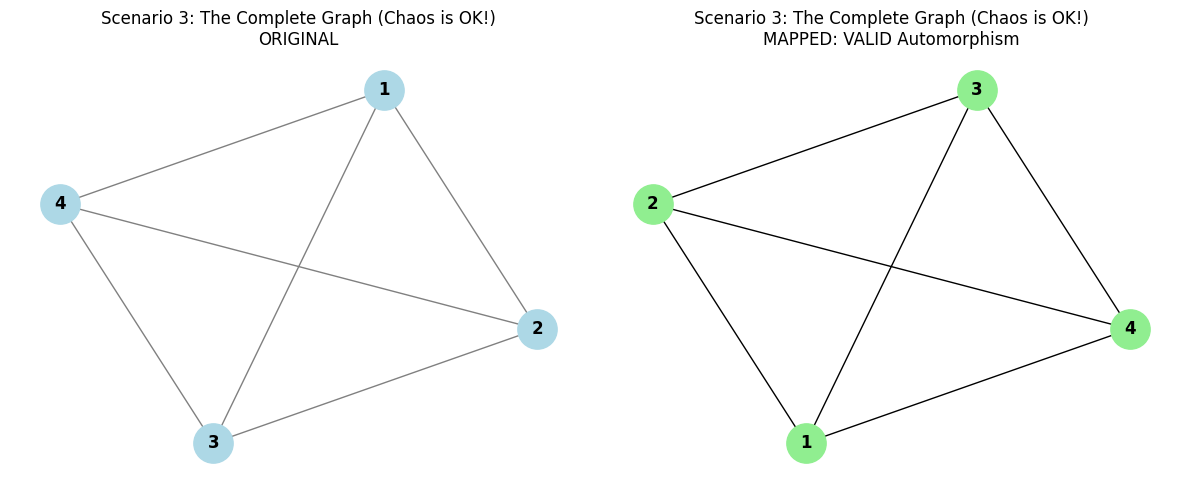

In [11]:
import matplotlib.pyplot as plt
import networkx as nx

def is_automorphism(G, mapping):
    """
    Check if a mapping is actually an automorphism of G.
    For every edge (u,v) in G, there must be an edge (mapping[u], mapping[v]) in G.
    """
    for u, v in G.edges():
        if not G.has_edge(mapping[u], mapping[v]):
            return False
    return True

def visualize_scenario(G, mapping, title_prefix):
    """
    Visualizes the Original Graph vs. the Graph after Permutation (Mapping).
    """
    plt.figure(figsize=(12, 5))
    
    # 1. Setup Layout (Fixed positions for consistency)
    pos = nx.spring_layout(G, seed=42) 
    
    # 2. Draw Original
    plt.subplot(1, 2, 1)
    nx.draw(G, pos, with_labels=True, node_color='lightblue', 
            node_size=800, font_weight='bold', edge_color='gray')
    plt.title(f"{title_prefix}\nORIGINAL")

    # 3. Create the Permuted Graph
    H = nx.relabel_nodes(G, mapping)
    
    # KEY FIX: Check if the MAPPING is an automorphism (not just isomorphism)
    is_auto = is_automorphism(G, mapping)
    
    # 4. KEY FIX: Position each node at its ORIGINAL location
    # If mapping[old] = new, then 'new' should be drawn at pos[old]
    inverse_mapping = {v: k for k, v in mapping.items()}
    pos_H = {node: pos[inverse_mapping[node]] for node in H.nodes()}
    
    # 5. Draw Permuted with corrected positions
    plt.subplot(1, 2, 2)
    color = 'lightgreen' if is_auto else 'salmon'
    status = "VALID Automorphism" if is_auto else "BROKEN Structure"
    
    nx.draw(H, pos_H, with_labels=True, node_color=color, 
            node_size=800, font_weight='bold', edge_color='black')
    plt.title(f"{title_prefix}\nMAPPED: {status}")
    
    plt.tight_layout()

# ==========================================
# SCENARIO 1: The Line (Path Graph)
# Structure: 1 - 2 - 3 - 4
# Constraint: Ends must map to Ends. Middle must map to Middle.
# ==========================================
G_line = nx.path_graph([1, 2, 3, 4])

# A. The "Flip" (Valid)
# We map 1->4, 2->3, 3->2, 4->1. The line is just reversed.
visualize_scenario(G_line, {1:4, 2:3, 3:2, 4:1}, "Scenario 1A: Reversing the Line")

# B. The "Fold" (Invalid)
# We try to put the end (1) into the middle (2). 
# This breaks the "1 only has 1 neighbor" rule.
visualize_scenario(G_line, {1:2, 2:1, 3:3, 4:4}, "Scenario 1B: Forcing End into Middle")


# ==========================================
# SCENARIO 2: The Star Graph
# Structure: 1 is Center. 2, 3, 4, 5 are Leaves.
# Constraint: Center must stay Center. Leaves can swap with Leaves.
# ==========================================
G_star = nx.star_graph(4) # Center is 0, Leaves 1-4. Let's relabel for clarity
G_star = nx.relabel_nodes(G_star, {0:1, 1:2, 2:3, 3:4, 4:5})

# A. Leaf Rotation (Valid)
# Center (1) stays 1. We just shuffle the outer nodes.
visualize_scenario(G_star, {1:1, 2:3, 3:4, 4:5, 5:2}, "Scenario 2A: Rotating Leaves")

# B. Center Swap (Invalid)
# We try to make a Leaf (2) the new Center.
# This creates a disaster where the new 'Center' only has 1 connection.
visualize_scenario(G_star, {1:2, 2:1, 3:3, 4:4, 5:5}, "Scenario 2B: Swapping Center w/ Leaf")


# ==========================================
# SCENARIO 3: The Edge Case (Complete Graph K4)
# Structure: Everything connects to everything.
# Constraint: NONE! You cannot break a connection if they all exist.
# ==========================================
G_complete = nx.complete_graph([1, 2, 3, 4])

# A. Total Chaos Swap (Valid)
# Even if we swap randomly, every node still connects to 3 others.
# In a Complete Graph, Permutation Group == Automorphism Group.
visualize_scenario(G_complete, {1:3, 2:4, 3:1, 4:2}, "Scenario 3: The Complete Graph (Chaos is OK!)")
plt.show()

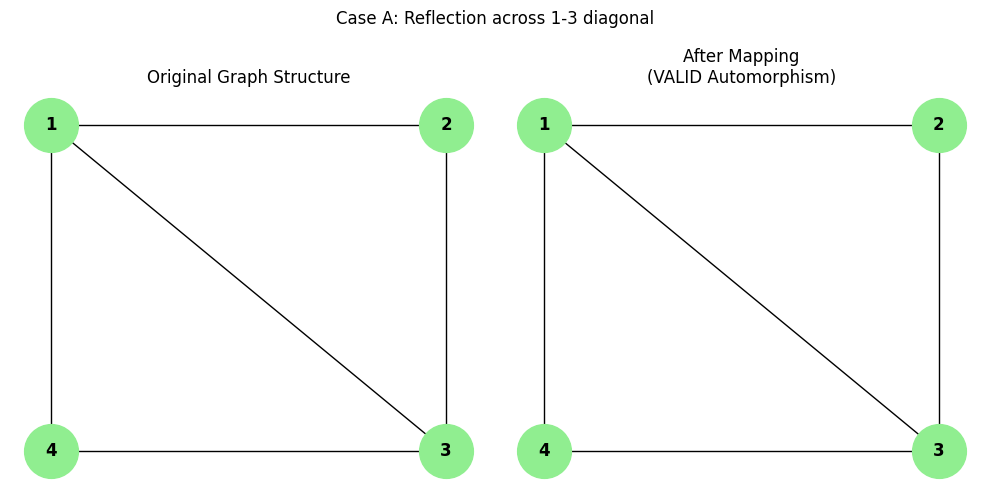

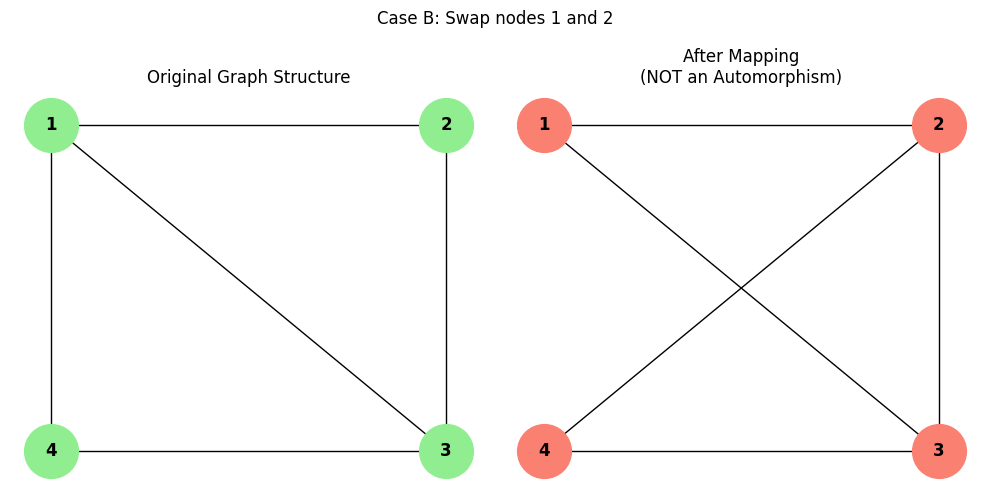

In [13]:
import matplotlib.pyplot as plt
import networkx as nx

def is_automorphism(G, mapping):
    """
    Check if a mapping is actually an automorphism of G.
    For every edge (u,v) in G, there must be an edge (mapping[u], mapping[v]) in G.
    """
    for u, v in G.edges():
        if not G.has_edge(mapping[u], mapping[v]):
            return False
    return True

def draw_comparison(G, mapping, title):
    plt.figure(figsize=(10, 5))
    
    # Fixed positions - these are SCREEN SLOTS, not tied to node identity
    fixed_pos = {1: (0, 1), 2: (1, 1), 3: (1, 0), 4: (0, 0)}
    
    # Plot Original
    plt.subplot(1, 2, 1)
    nx.draw(G, fixed_pos, with_labels=True, node_color='lightgreen', 
            node_size=1500, font_weight='bold')
    plt.title("Original Graph Structure")

    # Create the Permuted Graph
    H = nx.relabel_nodes(G, mapping)
    
    # CORRECT: Use the SAME positions!
    # If it's an automorphism, edges will connect the same screen slots
    # If NOT, edges will connect DIFFERENT slots - you'll SEE the difference!
    
    is_auto = is_automorphism(G, mapping)
    color = 'lightgreen' if is_auto else 'salmon'
    status = "VALID Automorphism" if is_auto else "NOT an Automorphism"
    
    plt.subplot(1, 2, 2)
    nx.draw(H, fixed_pos, with_labels=True, node_color=color, 
            node_size=1500, font_weight='bold')
    plt.title(f"After Mapping\n({status})")
    
    plt.suptitle(title)
    plt.tight_layout()

# --- SETUP ---
# Square with diagonal from 1 to 3
G = nx.Graph()
G.add_edges_from([(1, 2), (2, 3), (3, 4), (4, 1), (1, 3)])

# --- CASE A: Reflection (VALID) ---
# Swap 2 and 4, keep 1 and 3 fixed
# This reflects across the 1-3 diagonal
reflection_map = {1: 1, 2: 4, 3: 3, 4: 2}
draw_comparison(G, reflection_map, "Case A: Reflection across 1-3 diagonal")

# --- CASE B: Swap 1 and 2 (INVALID) ---
# This is NOT an automorphism - look at the edges!
swap_map = {1: 2, 2: 1, 3: 3, 4: 4}
draw_comparison(G, swap_map, "Case B: Swap nodes 1 and 2")


plt.show()

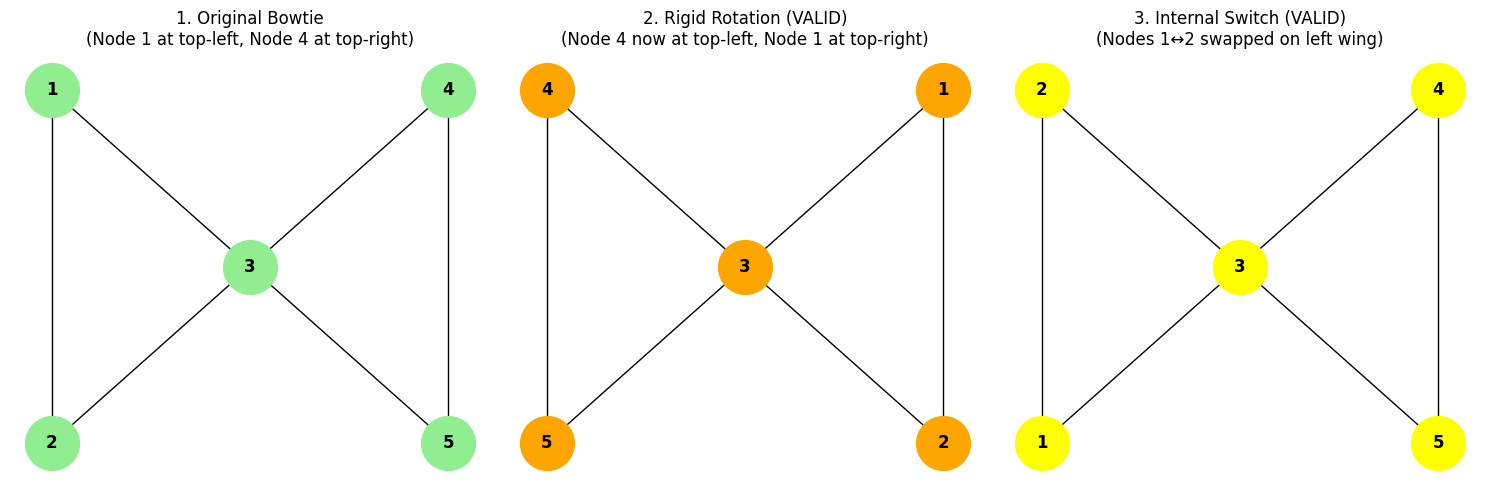

In [18]:
import networkx as nx
import matplotlib.pyplot as plt

def is_automorphism(G, mapping):
    """Check if mapping preserves edge structure."""
    for u, v in G.edges():
        if not G.has_edge(mapping[u], mapping[v]):
            return False
    return True

def compare_swaps():
    # Create a "Bowtie" Graph
    G = nx.Graph()
    G.add_edges_from([(1,2), (2,3), (3,1)])  # Left Triangle
    G.add_edges_from([(3,4), (4,5), (5,3)])  # Right Triangle
    
    # Screen positions - these are SLOTS on screen, not tied to node labels
    # Think of these as "slot A", "slot B", etc.
    pos = {
        1: (-2, 1), 2: (-2, -1),  # Left slots
        3: (0, 0),                 # Center slot
        4: (2, 1), 5: (2, -1)      # Right slots
    }
    
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    
    # 1. ORIGINAL
    nx.draw(G, pos, ax=axes[0], with_labels=True, node_color='lightgreen', 
            node_size=1500, font_weight='bold')
    axes[0].set_title("1. Original Bowtie\n(Node 1 at top-left, Node 4 at top-right)")
    
    # 2. THE ROTATION (180° flip): 1↔4, 2↔5, 3 stays
    rot_mapping = {1:4, 2:5, 3:3, 4:1, 5:2}
    G_rot = nx.relabel_nodes(G, rot_mapping)
    
    # KEY FIX: To show movement, we need to draw each NEW label 
    # at the position where its ORIGINAL node was.
    # If 1→4, then "4" should appear where "1" used to be (top-left)
    inverse_rot = {v: k for k, v in rot_mapping.items()}
    pos_rot = {node: pos[inverse_rot[node]] for node in G_rot.nodes()}
    
    is_auto_rot = is_automorphism(G, rot_mapping)
    status_rot = "VALID" if is_auto_rot else "INVALID"
    
    nx.draw(G_rot, pos_rot, ax=axes[1], with_labels=True, node_color='orange', 
            node_size=1500, font_weight='bold')
    axes[1].set_title(f"2. Rigid Rotation ({status_rot})\n(Node 4 now at top-left, Node 1 at top-right)")
    
    # 3. THE INTERNAL SWITCH (swap 1↔2 only)
    swap_mapping = {1:2, 2:1, 3:3, 4:4, 5:5}
    G_swap = nx.relabel_nodes(G, swap_mapping)
    
    inverse_swap = {v: k for k, v in swap_mapping.items()}
    pos_swap = {node: pos[inverse_swap[node]] for node in G_swap.nodes()}
    
    is_auto_swap = is_automorphism(G, swap_mapping)
    status_swap = "VALID" if is_auto_swap else "INVALID"
    
    nx.draw(G_swap, pos_swap, ax=axes[2], with_labels=True, node_color='yellow', 
            node_size=1500, font_weight='bold')
    axes[2].set_title(f"3. Internal Switch ({status_swap})\n(Nodes 1↔2 swapped on left wing)")
    
    plt.tight_layout()
    plt.show()

compare_swaps()

... a deep question in Group Theory...

... YES, there is a counterexample.


You are assuming that an Automorphism must be a GLOBAL RIGID ROTATION (like
spanning a whole pizza). But Graph Theory allows LOCAL TWISTING (like spinning
just one slice of the pizza while the rest stays still.)



THE COUNTEREXAMPLE: "THE BARBELL"
Imagine a graph that looks like a dumbbell:
    - LEFT SIDE: A triangle (Nodes 1, 2, 3)
    - RIGHT SIDE: A triangle (Nodes 4, 5, 6)
    - THE BAR: A line connecting them (Node 3 connects to Node 4)


THE AUTOMORPHISM:
    - Swap Node 1 and Node 2 (Spin the Left Weight).
    - Keep Nodes 4, 5, 6 exactly where they are (Hold the Right Weight).


WHY THIS BREAKS "ROTATION": If this were a physical object (a rigid dumbbell),
you CANNOT rotate the left side without also rotating the right side. To swap
1 and 2 by rotation, you'd have to flip the whole object 180 degrees, which 
would send the Right Triangle (4, 5, 6) over to the left side.

But in Graph Theory? You are allowed to "twist" just one end. The connections
are preserved locally.




THE TAKEAWAY:
    - ROTATION = Global Rigid Motion (If the left moves, the right must move).
    - AUTOMORPHISM = Structural Symmetry. (If the left is symmetric, I can
      twist it independently of the right).


So, Automorphism $\supset$ Rotation. (Automorphism is the "Super Class" that
includes Rotation, but also includes these weird "local twists" and 
"reflections" that Rotation cannot handle).      

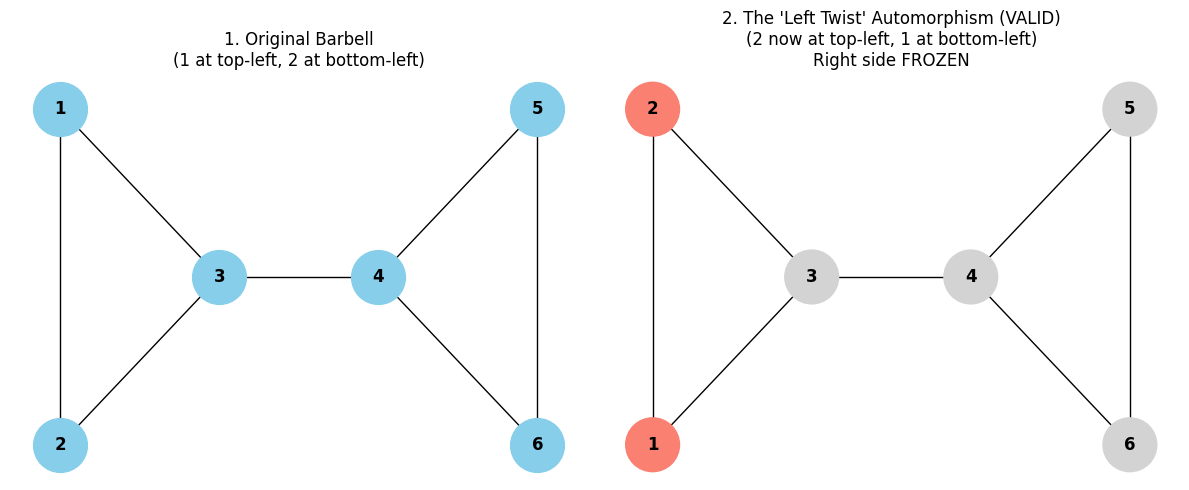

In [20]:
import networkx as nx
import matplotlib.pyplot as plt

def is_automorphism(G, mapping):
    """Check if mapping preserves edge structure."""
    for u, v in G.edges():
        if not G.has_edge(mapping[u], mapping[v]):
            return False
    return True

def visualize_local_twist():
    # 1. Create the Barbell Graph
    # Left Triangle: 1-2, 2-3, 3-1
    # Right Triangle: 4-5, 5-6, 6-4
    # The Bar: 3-4
    G = nx.Graph()
    G.add_edges_from([(1,2), (2,3), (3,1)])  # Left Weight
    G.add_edges_from([(4,5), (5,6), (6,4)])  # Right Weight
    G.add_edge(3, 4)  # The Bar
    
    # 2. Define Fixed Positions (screen slots)
    pos = {
        1: (-3, 1), 2: (-3, -1), 3: (-1, 0),  # Left Triangle
        4: (1, 0), 5: (3, 1), 6: (3, -1)       # Right Triangle
    }

    # 3. Define the Automorphism (The "Left Twist")
    # Swap 1 and 2, leave 3, 4, 5, 6 alone
    twist_map = {1:2, 2:1, 3:3, 4:4, 5:5, 6:6}

    # --- VISUALIZATION ---
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Plot 1: Original
    nx.draw(G, pos, ax=axes[0], with_labels=True, node_color='skyblue', 
            node_size=1500, font_weight='bold')
    axes[0].set_title("1. Original Barbell\n(1 at top-left, 2 at bottom-left)")

    # Plot 2: The Twist - actually relabel and show movement
    G_twisted = nx.relabel_nodes(G, twist_map)
    
    # Position each NEW label where its ORIGINAL was
    # If 1→2, then "2" should appear where "1" used to be
    inverse_map = {v: k for k, v in twist_map.items()}
    pos_twisted = {node: pos[inverse_map[node]] for node in G_twisted.nodes()}
    
    # Check if it's a valid automorphism
    is_auto = is_automorphism(G, twist_map)
    status = "VALID" if is_auto else "INVALID"
    
    # Color code: moved nodes vs static nodes
    node_colors = []
    for n in G_twisted.nodes():
        original_pos = inverse_map[n]
        if original_pos != n:  # Node moved
            node_colors.append('salmon')
        else:
            node_colors.append('lightgray')

    nx.draw(G_twisted, pos_twisted, ax=axes[1], with_labels=True, 
            node_color=node_colors, node_size=1500, font_weight='bold')
    axes[1].set_title(f"2. The 'Left Twist' Automorphism ({status})\n(2 now at top-left, 1 at bottom-left)\nRight side FROZEN")

    plt.tight_layout()
    plt.show()

visualize_local_twist()

It is great that the "Barbell Twist" clicked. That example is the "killer app"
for understanding this concept. Because it proves that symmetry is about
CONNECTIVITY, not just rigid geometry.

Here is the formal definition re-explained, now that you have the right 
intuition.



<<<<<<<<<<<>>>>>>>>>>>
THE FORMAL DEFINITION (MATHEMATICAL SYNTAX)

An AUTOMORPHISM of a graph $G (N, A)$ is a function $f : N \rightarrow N$
(a mapping of nodes to nodes) that satisfies two strict conditions:


1. BIJECTIVITY (PERMUTATION): The function $f$ is a BIJECTION (a one-to-one 
   mapping and onto mapping) from the node set to itself.
   - Translation: You are essentially shuffling the labels of the nodes. You
     cannot delete nodes or merge two nodes into one.

2. PRESERVATION OF ADJACENCY (THE "TABLE GROOVE" RULE): For any two nodes
   $u, v$ in the graph:
    $${u, v} \in A \Longleftrightarrow {f(u), f(v)} \in A$$
    - Translation: If there was a connection between $u$ and $v$ before the 
      shuffle, there MUST be a connection between their new positions $f(u)$
      and $f(v)$ after the shuffle.



<<<<<<<<<<<<<<>>>>>>>>>>>>>>
THE "NEW" WAY TO LOOK AT IT

Before, you might have looked at Automorphism as "Does the shape look the same?"
Now, you should look at it as "THE INDISTINGUISHABILITY TEST."

THE TEST: If I blindfold you, swap to nodes, and then take the blindfold off...
can you tell that I touched anything just by looking at the connections?
    - IF YOU CANNOT TELL: The nodes are "Twins" (structurally indistinguishable)
      . The swap is an AUTOMORPHISM.
    - IF YOU CAN TELL: You broke a connection. The swap is NOT an automorphism.





[[[[[[[[[[[[[[]]]]]]]]]]]]]]      
SUMMARY FOR YOUR NOTES

1. AUTOMORPHISM is a specific type of ISOMORPHISM where the start graph and end
   graph are the same ($G \cong G$).
2. It creates a GROUP (The Automorphism Group).
    - Includes IDENTITY (Do nothing)
    - Includes ROTATIONS (Global spins)
    - Includes REFLECTIONS (Flips)
    - Includes LOCAL SWAPS (The Barbell Twist/"Twin" Swaps)
3. KEY INTUITION: It is the mathematical measure of SYMMETRY. The more 
   automorphisms a graph has, the more symmetric it is. (A random squiggle
   usually only has 1 automorphism: The Identity).

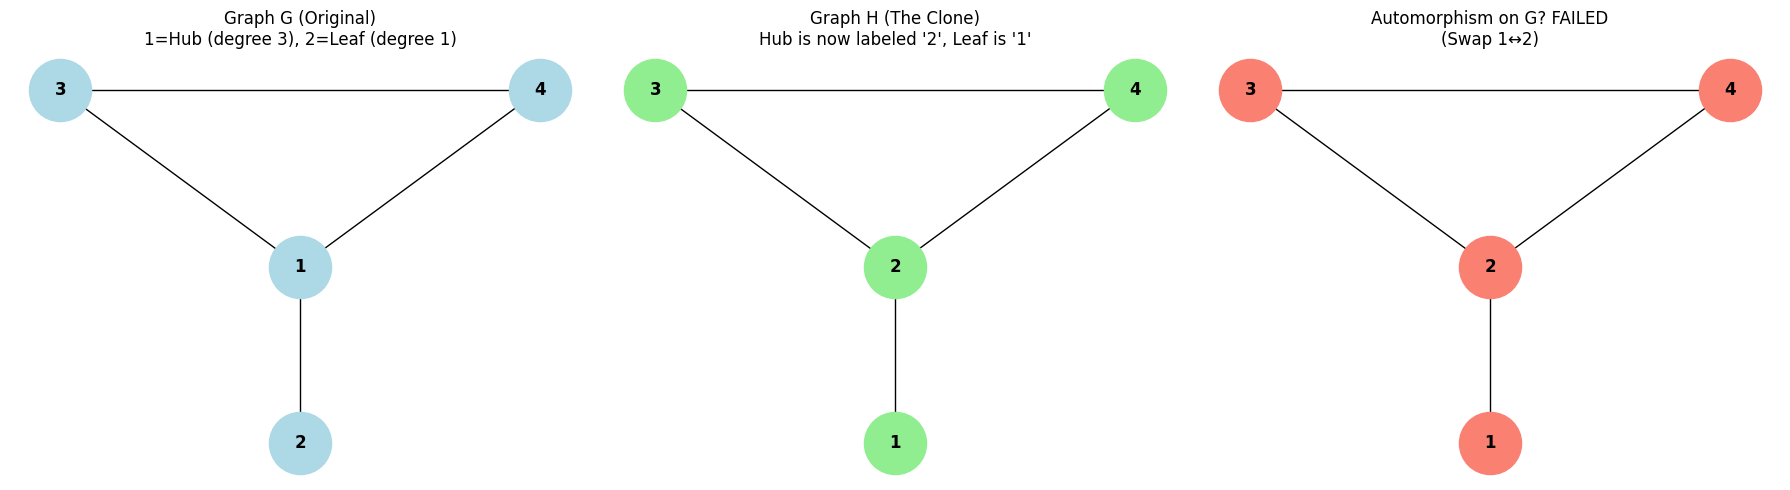

In [22]:
import networkx as nx
import matplotlib.pyplot as plt

def is_automorphism(G, mapping):
    """Check if mapping preserves edge structure."""
    for u, v in G.edges():
        if not G.has_edge(mapping[u], mapping[v]):
            return False
    return True

def isomorphism_vs_automorphism():
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))

    # --- 1. GRAPH G (The Original) ---
    # A Kite: 1 is the Hub (Degree 3), 2 is a Leaf (Degree 1)
    G = nx.Graph()
    G.add_edges_from([(1,3), (1,4), (3,4), (1,2)])
    
    pos_G = {1: (0,0), 2: (0,-1), 3: (-1,1), 4: (1,1)}
    nx.draw(G, pos_G, ax=axes[0], with_labels=True, node_color='lightblue', 
            node_size=2000, font_weight='bold')
    axes[0].set_title("Graph G (Original)\n1=Hub (degree 3), 2=Leaf (degree 1)")

    # --- 2. GRAPH H (The Clone) ---
    # Structurally identical, but we labeled the Hub '2' and the Leaf '1'
    H = nx.Graph()
    H.add_edges_from([(2,3), (2,4), (3,4), (2,1)])
    
    pos_H = {2: (0,0), 1: (0,-1), 3: (-1,1), 4: (1,1)}
    nx.draw(H, pos_H, ax=axes[1], with_labels=True, node_color='lightgreen', 
            node_size=2000, font_weight='bold')
    axes[1].set_title("Graph H (The Clone)\nHub is now labeled '2', Leaf is '1'")

    # --- THE ISOMORPHISM CHECK ---
    is_iso = nx.is_isomorphic(G, H)
    axes[1].set_xlabel(f"Isomorphism G→H? {is_iso}\n(Hub maps to Hub, Leaf maps to Leaf)")

    # --- 3. THE AUTOMORPHISM CHECK (The Self-Swap) ---
    # Try to swap 1 and 2 within G itself
    swap_map = {1:2, 2:1, 3:3, 4:4}
    G_swapped = nx.relabel_nodes(G, swap_map)
    
    # Position new labels where originals were
    inverse_map = {v: k for k, v in swap_map.items()}
    pos_swapped = {node: pos_G[inverse_map[node]] for node in G_swapped.nodes()}
    
    # Check if it's a valid automorphism
    is_auto = is_automorphism(G, swap_map)
    color = 'lightgreen' if is_auto else 'salmon'
    
    nx.draw(G_swapped, pos_swapped, ax=axes[2], with_labels=True, 
            node_color=color, node_size=2000, font_weight='bold')
    
    axes[2].set_title(f"Automorphism on G? {'VALID' if is_auto else 'FAILED'}\n(Swap 1↔2)")
    
    if not is_auto:
        axes[2].set_xlabel("Hub (1) had edges to 3,4. Leaf (2) didn't.\n"
                          "After swap: '2' at hub position needs edges to 3,4\n"
                          "but original G has no edge (2,3) or (2,4)!")

    plt.tight_layout()
    plt.show()

isomorphism_vs_automorphism()

ABOVE is cases where the swap is an ISOMORPHISM BUT NOT AN AUTOMORPHISM




... which come to think of it this does make sense then... isomorphism only cares about the structure?
regardless of what the node is... and only cares about the nodes and edges being the same pre and post transformation


whilst automorphism is isomorphism... but where and how the node connects with respect to one another matters... including
all the other constraints thats applied to automorphism too ofc... which i understand clearly now

1. Isomorphism: "The Identical Twin Car"
   Imagine you own a Red Ford Fiesta. Your neighbor buys the exact same Red Ford Fiesta.
    - The Test: If you sneak out at night and swap your car for his car, will he notice?
    - Answer: NO.
    - Why: They are structurally identical. The steering wheel is on the right for both. The engine is in the front for both.
    - This is Isomorphism. It is a mapping between Object A and Object B.


2. Automorphism: "Rotating The Tires"
   Now, forget the neighbor. Look only at YOUR car.
    - The Test: You take the Front-Left Tire and swap it with the Front-Right Tire. Will the car still drive properly?
    - Answer: YES.
    - Why: The two front tires are "Twins." They connect to the axle in the exact same way.
    - This is Automorphism. It is a mapping within Object A (swapping parts of itself) that preserves the function.


3. The Counter-Example (Why "Swapping" fails)
   Now, try to swap the Steering Wheel with the Exhaust Pipe on your car.
    - The Test: Will the car work?
    - Answer: NO.
    - Why: The Steering Wheel connects to the wheels. The Exhaust connects to the engine. They have different "neighbors." You broke the structure.
    - Result: This is NOT an automorphism.




SUMMARY OF THE CAR ANALOGY:
    1. ISOMORPHISM: Does my car have the same structure as your car? (Yes).
    2. AUTOMORPHISM: Can I swap parts WITHIN MY OWN CAR without breaking it?
        - Swap Left/Right Tires? YES (They are structurally symmetric).
        - Swap Tire/Engine? NO. (They have different structural jobs).    






            ---
            and yeah so if u swap tire and engine. it would still b isomorphic right? 
            ig this is interesting to think abt why mathematicians defo needed a subset 
            of isomorphism to mimic irl what not

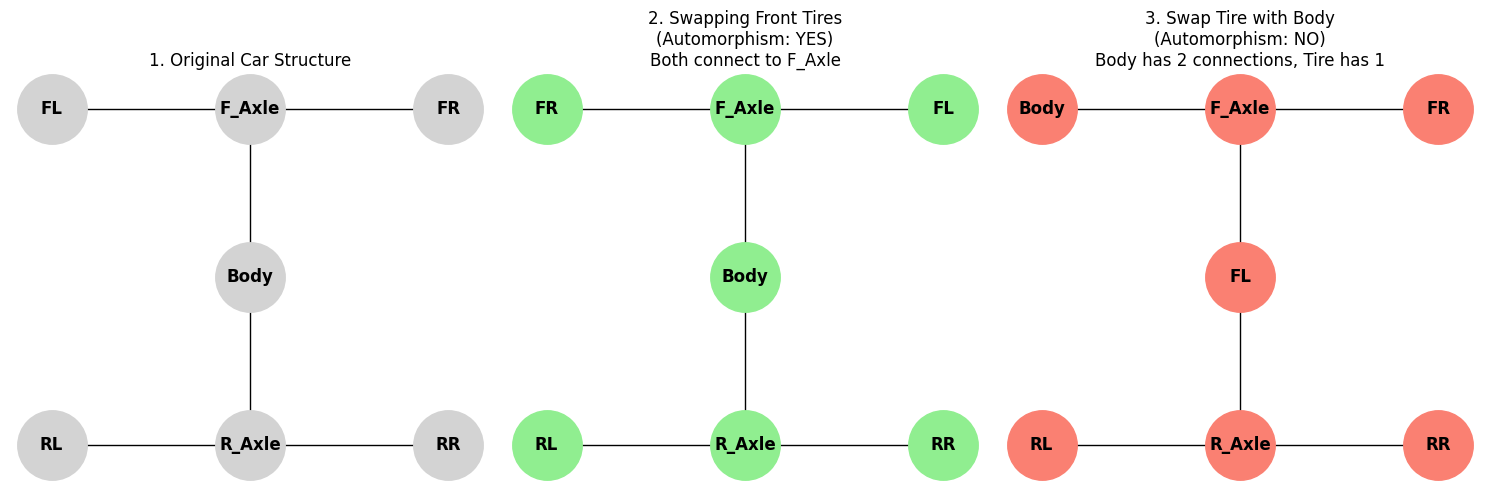

In [24]:
import networkx as nx
import matplotlib.pyplot as plt

def is_automorphism(G, mapping):
    """Check if mapping preserves edge structure."""
    for u, v in G.edges():
        if not G.has_edge(mapping[u], mapping[v]):
            return False
    return True

def car_automorphism_analogy():
    # 1. Build the "Car Graph"
    G = nx.Graph()
    # Front connections
    G.add_edges_from([('FL', 'F_Axle'), ('FR', 'F_Axle')])
    # Rear connections
    G.add_edges_from([('RL', 'R_Axle'), ('RR', 'R_Axle')])
    # Body connections
    G.add_edges_from([('F_Axle', 'Body'), ('R_Axle', 'Body')])

    # Layout for visualization (screen positions)
    pos = {
        'FL': (0, 2), 'FR': (2, 2), 'F_Axle': (1, 2),
        'Body': (1, 1),
        'RL': (0, 0), 'RR': (2, 0), 'R_Axle': (1, 0)
    }

    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    # --- PLOT 1: THE ORIGINAL CAR ---
    nx.draw(G, pos, ax=axes[0], with_labels=True, node_color='lightgray', 
            node_size=2500, font_weight='bold')
    axes[0].set_title("1. Original Car Structure")

    # --- PLOT 2: TIRE ROTATION (Valid Automorphism) ---
    # Swap Front Left (FL) with Front Right (FR)
    mapping_valid = {
        'FL': 'FR', 'FR': 'FL', 
        'F_Axle': 'F_Axle', 'Body': 'Body', 
        'RL': 'RL', 'RR': 'RR', 'R_Axle': 'R_Axle'
    }
    
    G_valid = nx.relabel_nodes(G, mapping_valid)
    
    # Position new labels where originals were
    inverse_valid = {v: k for k, v in mapping_valid.items()}
    pos_valid = {node: pos[inverse_valid[node]] for node in G_valid.nodes()}
    
    is_auto_valid = is_automorphism(G, mapping_valid)
    color_valid = 'lightgreen' if is_auto_valid else 'salmon'
    
    nx.draw(G_valid, pos_valid, ax=axes[1], with_labels=True, 
            node_color=color_valid, node_size=2500, font_weight='bold')
    axes[1].set_title(f"2. Swapping Front Tires\n(Automorphism: {'YES' if is_auto_valid else 'NO'})\nBoth connect to F_Axle")

    # --- PLOT 3: SWAP TIRE WITH BODY (Invalid) ---
    mapping_invalid = {
        'FL': 'Body', 'Body': 'FL', 
        'FR': 'FR', 'F_Axle': 'F_Axle', 
        'RL': 'RL', 'RR': 'RR', 'R_Axle': 'R_Axle'
    }
    
    G_invalid = nx.relabel_nodes(G, mapping_invalid)
    
    inverse_invalid = {v: k for k, v in mapping_invalid.items()}
    pos_invalid = {node: pos[inverse_invalid[node]] for node in G_invalid.nodes()}
    
    is_auto_invalid = is_automorphism(G, mapping_invalid)
    color_invalid = 'lightgreen' if is_auto_invalid else 'salmon'
    
    nx.draw(G_invalid, pos_invalid, ax=axes[2], with_labels=True, 
            node_color=color_invalid, node_size=2500, font_weight='bold')
    axes[2].set_title(f"3. Swap Tire with Body\n(Automorphism: {'YES' if is_auto_invalid else 'NO'})\nBody has 2 connections, Tire has 1")

    plt.tight_layout()
    plt.show()

car_automorphism_analogy()

In [ ]:
                                                _
                  ___                          (_)
                _/XXX\
 _             /XXXXXX\_                                    __
 X\__    __   /X XXXX XX\                          _       /XX\__      ___
     \__/  \_/__       \ \                       _/X\__   /XX XXX\____/XXX\
   \  ___   \/  \_      \ \               __   _/      \_/  _/  -   __  -  \__/
  ___/   \__/   \ \__     \\__           /  \_//  _ _ \  \     __  /  \____//
 /  __    \  /     \ \_   _//_\___     _/    //           \___/  \/     __/
 __/_______\________\__\_/________\_ _/_____/_____________/_______\____/_______
                                   /|\
                                  / | \
                                 /  |  \
                                /   |   \
                               /    |    \
                              /     |     \
                             /      |      \
                            /       |       \
                           /        |        \
                          /         |         \


---

The reason you are confused is that you are 100% right about ISOMORPHISM, but
AUTOMORPHISM has one extra, strict rule that is tripping you up.

You said: "the structure is literally still the same."

FOR ISOMORPHISM: YES. You are right. If you swap nodes 1 and 2, you still have a
square with a diagnol. It's the same shape.
FOR AUTOMORPHISM: NO. It fails.



<<<<<<<<<<<<<<<<<<<<<<<>>>>>>>>>>>>>>>>>>>>>>>
THE "TABLE GROOVE" ANALOGY (Read This)

Imagine I carve your graph into a wooden table. There are deep grooves for the
edges `(1-2)`, `(2-3)`, `(3-4)`, `(4-1)`, and the diagnol `(1-3)`.


Now, I give you a set of marbles labelled 1, 2, 3, 4 connected by strings.

1. ISOMORPHISM: You can hold the marbles in the air, untangle them, and say
   "Look! It's the same shape!" (This is what you are doing in Case B)
2. AUTOMORPHISM: You have to press the marbles BACK INTO THE TABLE GROOVES.
    - In CASE B, you swapped 1 and 2.
    - So you put Marble 2 ino Slot 1. You put Marble 1 into Slot 2.
    - Marble 4 is sitting in Slot 4. 
    - THE PROBLEM: There is a string connecting Marble 4 to Marble 2 (because
      4 connected to 1 originally, and 1 is now 2).


SUMMARY

---

In [ ]:
                                                 .;
                                               .`;'
                                           . ` ;;'
                                  . ` `  `   ;;;'
                                `       @  ;;;
                             `            ;;;
                           `            ;;;;
                         `            ;;;;;.
                       `           .;;;;;;**.
                      `          ;`* .;;; `**.
                    `           ;;`****.    '*.
               '** `           ;;;;'****.    .
             '****`            ;;;;;`***.
           '*****`           ;;;;;;  `**.
            ` **`          ;;;;;;;    .*
             `*`         ;;;;;;;;
              `        ;;;;;;;;
              `      ;;;;;;;;
            `      ;;;;;;;
           `     ;;;;;;    . *
         `      ;;;;      ***
         .     ;;       ***
  * *    .    ;;      **
***  *    ` .;;     **
 **        .****.       * *
*       . * ^^ *'.   *  ****
  * *               *     ****
***  *        *             ***
***           **
 *            ***
               ***
               **

This specific example is the perfect "final boss" for your new world model! It
shows exactly why we have to care about RELATIONSHIPS (edges) rather than just
DEGREES.

If we only cared about degrees, you'd be right: Node 1 and Node 7 both have a 
degree of 2, so they look the same. But in an automorphism, you have to preserve
the ENTIRE STRUCTURE--the "wires" between the sockets.



<<<<<<<<<<>>>>>>>>>>
WHY NODE 7 IS "DRAGGED ALONG" BY NODE 1

Look at the shape of $G_3$. It is three triangles meeting at a central hub (Node
2).
    1. NODE 2 IS THE HUB: It has a degree of 6. No other node is like it, so it
       MUST stay put (fixed).
    2. NODE 1 AND NODE 7 ARE PARTNERS: They aren't just two random nodes with
       degree 2, they are CONNECTED TO EACH OTHER.
    3. THE CONSTRAINT: In any automorphism, if two nodes are connected in the
       original graph, their "new" versions must also be connected.


THE "HANDCUFF" ANALOGY

Imagine Node 1 and Node 7 are handcuffed together.
    - You decide to move Node 1 to the "position" currently held by Node 3.
    - Because Node 1 was connected to Node 7 and the Hub (Node 2), the "new"
      Node 1 MUST still be connected to the "new" Node 7 and the hub.
    - There is only ONE node connected to both "New 1" (Node 3) and the Hub: 
      NODE 4.
    - Therefore, the moment you chose where Node 1 goes, Node 7 HAS NO CHOICE.
      It is "dragged" into the only available slot that maintains the triangle.



<<<<<<<<<<>>>>>>>>>>
WHY NODE 7 IS "DRAGGED ALONG" BY NODE 1

Look at the shape of $G_3$. It is three triangles meeting at a central hub (Node
2).
    1. NODE 2 IS THE HUB: It has a degree of 6. No other node is like it, so it
       MUST stay put (fixed).
    2. NODE 1 AND NODE 7 ARE PARTNERS: They aren't just two random nodes with
       degree 2; they are CONNECTED TO EACH OTHER.
    3. THE CONSTRAINT: In any automorphism, if two nodes are connected in the
       original graph, their "new" versions must also be connected.





{{{{{{{{{{{{}}}}}}}}}}}}             
WHY IT'S NOT 6! (6 Factorial)

If you could move every degree-2 node anywhere, you would be BREAKING THE 
TRIANGLES.

If you moved Node 1 to Node 3's spot, but moved Node 7 to Node 5's spot, you
have "snapped" the wire between them. The original graph had an edge $(1, 7)$
, but your new mapping has no edge between the nodes in those positions. THAT IS
NO LONGER AN AUTOMORPHISM.



Choice,Number of Ways,Reasoning
Node 2,1,"It’s the only one with degree 6. It has no ""twins."""
Node 1,6,"It can move to any of the 6 ""outer"" positions (1, 3, 4, 5, 6, or 7)."
Node 7,1 (Fixed),"Once Node 1 picks a triangle, 7 must pick the other tip of that same triangle."
Node 3,4,2 positions are now taken. 4 outer positions remain.
Node 4,1 (Fixed),Must be the partner of whatever Node 3 picked.
Node 5,2,Only one triangle (2 spots) left.
Node 6,1 (Fixed),Must be the partner of Node 5.




<<<<<<<<<<<<<<>>>>>>>>>>>>>>
SUMMARY: SLOTS AND RESPONSIBILITIES

You are absolutely right that we care about RESPONSIBILITIES.
    - The "Responsibility" of Node 7 is not just "Have degree-2".
    - It's responsibility is "HAVE DEGREE 2 AND BE THE NEIGHBOUR OF NODE 1."

When you move Node 1, you move its "neighbour requirement" with it. That's why
Node 7    

In [ ]:
 ____________________________________                 ______________
|------|------|     __   __   __     |     ___________     |           () |
| 64X4 | 64X4 | || |  | |  | |  |    |    |           |    |           ___|
|------|------| || |  | |  | |  |    |____|           |____|         || D |
| 64X4 | 64X4 | || |__| |__| |__|                 ________________  ||| I |
|------|------|  |  ________   ______   ______   | ADV476KN50     | ||| P |
| 64X4 | 64X4 |    |TRIDENT | |______| |______|  | 1-54BV  8940   | ||| S |
|------|------| || |TVGA    | |______| |______|  |________________| |||___|
| 64X4 | 64X4 | || |8800CS  |          ________________                ___|
|------|------| || |11380029|    LOW->|  /\ SUPER VGA  | _________    |   |
| 64X4 | 64X4 |     --------    BIOS  | \/         (1) ||_________|   | 1 |
|------|------| ||  ______  J  ______ |________________| _________    | 5 |
| 64X4 | 64X4 | || |______| 2 |______| ________________ |_________|   |___|
|------|------| ||  ________   ______ |  /\ SUPER VGA  |               ___|
| 64X4 | 64X4 |    |________| |______|| \/         (2) |   _________  |   |
|------|------| ()              HIGH->|________________|  |_________| | 9 |
 | 64X4 | 64X4 |     ________   _________   _____________   _________  |   |
 |______|______|__  |________| |_________| |_____________| |_________| |___|
                 |               __    TVGA-1623D                    _ () |
                 |LLLLLLLLLLLLLL|  |LLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLL| |___|
                                                                          |
                                                                          |

                                                                          

 ____________________________________                 ______________
|------|------|     __   __   __     |     ___________     |           () |
| 64X4 | 64X4 | || |  | |  | |  |    |    |           |    |           ___|
|------|------| || |  | |  | |  |    |____|           |____|         || D |
| 64X4 | 64X4 | || |__| |__| |__|                 ________________  ||| I |
|------|------|  |  ________   ______   ______   | ADV476KN50     | ||| P |
| 64X4 | 64X4 |    |TRIDENT | |______| |______|  | 1-54BV  8940   | ||| S |
|------|------| || |TVGA    | |______| |______|  |________________| |||___|
| 64X4 | 64X4 | || |8800CS  |          ________________                ___|
|------|------| || |11380029|    LOW->|  /\ SUPER VGA  | _________    |   |
| 64X4 | 64X4 |     --------    BIOS  | \/         (1) ||_________|   | 1 |
|------|------| ||  ______  J  ______ |________________| _________    | 5 |
| 64X4 | 64X4 | || |______| 2 |______| ________________ |_________|   |___|
|------|------| ||  ________   ______ |  /\ SUPER VGA  |               ___|
| 64X4 | 64X4 |    |________| |______|| \/         (2) |   _________  |   |
|------|------| ()              HIGH->|________________|  |_________| | 9 |
 | 64X4 | 64X4 |     ________   _________   _____________   _________  |   |
 |______|______|__  |________| |_________| |_____________| |_________| |___|
                 |               __    TVGA-1623D                    _ () |
                 |LLLLLLLLLLLLLL|  |LLLLLLLLLLLLLLLLLLLLLLLLLLLLLLLL| |___|
                                                                          |
                                                                          |                                                                          


2. WHY FIXING 1 FIXES 7

    Let's trace the logic:
    1. THE CENTER IS FIXED: Node 2 is the only node with degree 6. It must map
       to itself. So $\phi(2) = 2$.
    2. MOVING NODE 1: Node 1 has degree-2. It can indeed map to any of the 6
       outer nodes (1, 3, 4, 5, 6, 7) because they all "look" the same 
       structurally. Let's say we decide to map Node 1 to position 3. So
       $\phi(1) = 3$.
    3. THE CONSTRAINT ON NODE 7: In the original graph, Node 7 is connected to
       Node 1.
       - RULE OF ISOMORPHISM: If 1 and 7 are connected, then their destinations
         $\phi(1)$ and $\phi(7)$ MUST ALSO BE CONNECTED.
       - So, $\phi(7)$ must be a neighbour of $\phi(1)$ (which is 3).
       - Who are the neighbours of 3? Only 2 and 4.
       - Node 2 is already taken (it's the center).
       - Therefore, $\phi(7)$ MUST BE 4. It has literally nowhere else to go.



3. WHY IT'S NOT $1 \times 6!$

If you did $1 \times $

In [ ]:
  -----                                                               -----
1 | H |                                                               |He |
  |---+----                                       --------------------+---|
2 |Li |Be |                                       | B | C | N | O | F |Ne |
  |---+---|                                       |---+---+---+---+---+---|
3 |Na |Mg |3B  4B  5B  6B  7B |    8B     |1B  2B |Al |Si | P | S |Cl |Ar |
  |---+---+---------------------------------------+---+---+---+---+---+---|
4 | K |Ca |Sc |Ti | V |Cr |Mn |Fe |Co |Ni |Cu |Zn |Ga |Ge |As |Se |Br |Kr |
  |---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---|
5 |Rb |Sr | Y |Zr |Nb |Mo |Tc |Ru |Rh |Pd |Ag |Cd |In |Sn |Sb |Te | I |Xe |
  |---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---+---|
6 |Cs |Ba |LAN|Hf |Ta | W |Re |Os |Ir |Pt |Au |Hg |Tl |Pb |Bi |Po |At |Rn |
  |---+---+---+------------------------------------------------------------
7 |Fr |Ra |ACT|
  -------------
              -------------------------------------------------------------
   Lanthanide |La |Ce |Pr |Nd |Pm |Sm |Eu |Gd |Tb |Dy |Ho |Er |Tm |Yb |Lu |
              |---+---+---+---+---+---+---+---+---+---+---+---+---+---+---|
   Actinide   |Ac |Th |Pa | U |Np |Pu |Am |Cm |Bk |Cf |Es |Fm |Md |No |Lw |
              -------------------------------------------------------------


SOURCE: https://chatgpt.com/c/697823e0-cb28-8390-a5c5-c10e8360ff6d

Let $G=(V,E)$ be a graph (vertex set $V$, edge set $E$).

## Adjacency (being neighbors)

**Undirected graph.** Two vertices $u,v\in V$ are **adjacent** (neighbors) iff there is an edge joining them, i.e.
$$
u\sim v \quad\Longleftrightarrow\quad {u,v}\in E.
$$
The **(open) neighborhood** of $v$ is
$$
N_G(v)={u\in V:{u,v}\in E}.
$$
(Some definitions allow **loops**; then $v$ can be adjacent to itself if ${v,v}\in E$.) 

**Directed graph (digraph).** Edges are ordered pairs ((u,v)). One typically distinguishes:

* $u$ is an **in-neighbor** of $v$ if $(u,v)\in E$,
* $u$ is an **out-neighbor** of $v$ if $(v,u)\in E$. 

## Graph isomorphism (same graph “up to relabeling”)

For (simple, unlabeled, unweighted) graphs $G$ and $H$, an **isomorphism** is a **bijection**
$$
f:V(G)\to V(H)
$$
such that adjacency is preserved:
$$
{u,v}\in E(G)\ \Longleftrightarrow\ {f(u),f(v)}\in E(H)
\quad\text{for all }u,v\in V(G).
$$
Equivalently: $u$ and $v$ are adjacent in $G$ iff $f(u)$ and $f(v)$ are adjacent in $H$. ([Engineering LibreTexts][1])

**Extra structure.** If your graphs have extra structure, “isomorphism” usually means the bijection must preserve that too (e.g., arc directions for digraphs, weights for weighted graphs, labels/colors for labeled/colored graphs). ([Wikipedia][2])

**Multigraphs (parallel edges).** If multiple edges between the same endpoints are allowed, you generally need a **vertex bijection and an edge bijection** that are *consistent* with incidence (endpoints map to endpoints), so multiplicities are preserved. 

## Automorphism (symmetry of a graph)

An **automorphism** of $G$ is an isomorphism from $G$ to itself: a **permutation** $g:V\to V$ such that
$$
u\sim v \quad\Longleftrightarrow\quad g(u)\sim g(v).
$$
All automorphisms form a group under composition, denoted $\mathrm{Aut}(G)$. 

[1]: https://eng.libretexts.org/Bookshelves/Computer_Science/Programming_and_Computation_Fundamentals/Mathematics_for_Computer_Science_%28Lehman_Leighton_and_Meyer%29/02%3A_Structures/11%3A_Simple_Graphs/11.04%3A_Isomorphism "11.4: Isomorphism - Engineering LibreTexts"
[2]: https://en.wikipedia.org/wiki/Graph_isomorphism "Graph isomorphism - Wikipedia"


Yes—provided $G$ is an undirected graph and $g$ is a bijection $g:V(G)\to V(G)$ (i.e., a permutation of the vertex set), the automorphism condition is exactly:

$$
{u,v}\in E(G)\ \Longleftrightarrow\ {g(u),g(v)}\in E(G)\quad\text{for all }u,v\in V(G).
$$

Notes (common variants):

* **Digraph:** use ordered pairs:
  $$
  (u,v)\in E(G)\ \Longleftrightarrow\ (g(u),g(v))\in E(G).
  $$
* **Loops allowed:** the same condition applies; it will also preserve loops $({v,v}\in E\iff {g(v),g(v)}\in E)$.
* **Multigraph:** it must preserve **edge multiplicity** between any pair (not just whether an edge exists).
* **Colored/weighted/labeled graphs:** $g$ must also preserve the extra structure (colors/weights/labels), not only adjacency.


---

- In graph theory, the DEGREE of a vertex (or node) is the number of edges
  INCIDENT to it, representing its local connectivity. ITt counts how many
  connections a specific vertex has, with loops contributing 2 to the degree.
  The sum of all degrees in a graph is equal to twice the number of arcs/edges.


- A graph automorphism is a symmetry of a graph, defined as a permutation of its
  vertices that preserves vertex adjacency (edges), mapping the graph onto 
  itself. The set of all such aotomorphisms forms the AUTOMORPHISM GROUP of the
  graph, which measures the graph's structural symmetry. They are crucial in
  algebraic graph theory, network analysis and chemistry.


- An AUTOMORPHISM is a specific type of ISOMORPHISM and therefore forms a subset
  of all possible isomorphisms. Specifically, an automorphism is defined as an
  isomorphism from a mathematical object (such as a group)



- In graph theory, a group usually refers to the AUTOMORPHISM GROUP of a graph,
  which is the set of all vertex permutations that preserve adjacency, forming
  a symmetry group under function composition. Groups, which are algebraic 
  structures (sets with assosciative, invertible binary operations), are also
  used to define specific graphs, such as Cayley graphs or power graphs...

  Key aspects of groups in graph theory include:
    - AUTOMORPHISM GROUPS: Every graph $G$ has an automorphism group, $Aut(G)$,
      representing its structural symmetries. Conversely, any group can be
      represented as the automorphism group of some graph, a result established
      by Frucht's theorem.